<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I need you to write a script to -
build a 250*250 matrix which will be represting a picture.
In the middle of the picture, there should be a 50*50 white square.
Other than the white square, the rest of the image should be all black

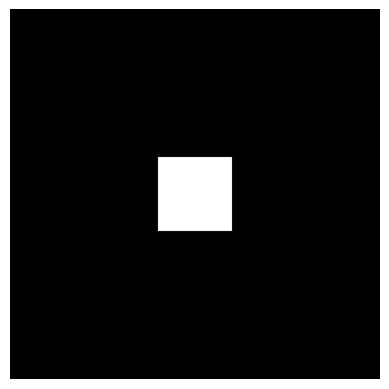

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 250x250 matrix filled with zeros (black background)
image = np.zeros((250, 250))

# Define the coordinates for the white square
start_row, end_row = 100, 150  # 250 - 50 = 200 / 2 = 100
start_col, end_col = 100, 150  # 250 - 50 = 200 / 2 = 100

# Set the values in the specified region to 1 (white)
image[start_row:end_row, start_col:end_col] = 1

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


That's great.
Now, I need you to write a script to check the middle row of the image.
For that middle row, I need you to output a graph representing the pixel values in each cell of the row.

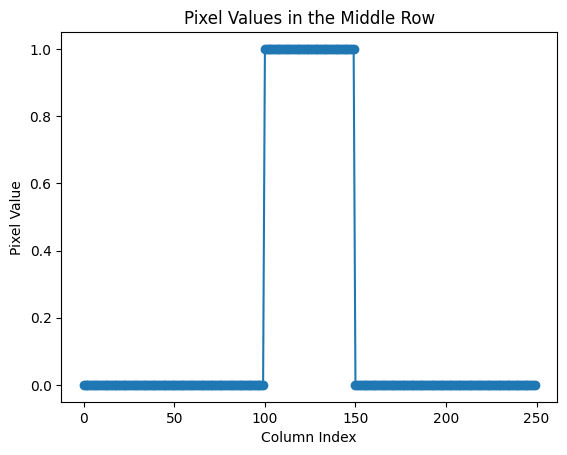

In [2]:
import matplotlib.pyplot as plt

# Extract the middle row of the image
middle_row = image[125, :]

# Plot the pixel values along the middle row
plt.plot(middle_row, marker='o', linestyle='-')
plt.title('Pixel Values in the Middle Row')
plt.xlabel('Column Index')
plt.ylabel('Pixel Value')
plt.show()


## P1:
Good.
Now, I need you to write a script to output the same white square with black background.
This time, I want to be dynamically outputting the square, so that it appears as if the square is running through the left-to-right diagonal.
The square should be constantly running through the diagonal. Once down-right is achieved, the square goes back to top left

## P2:
I need you to re-write the script.
First, use the image you have previously created.
Second, I want to output the image using cv2 and not plt

##P3:
remember we are in google colab. cv2.imshow isnt working, use the google patch

##P4:
Change it so the matrix is holding pixel values in greyscale, 0 to 255.
The square should have a color of 100

##P5:
This script is outputting a separate image after every move.
I want to have a single picture constantly updating.
Also, I want the script to be running infinitely until the user hits q

##P6:
save a single run through the diagonal into a video file. Then run the video file

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import time

# Create a 250x250 matrix with greyscale values
image = np.zeros((250, 250), dtype=np.uint8)

# Set the color of the square to 100
square_color = 100

# Initialize the size of the square
square_size = 50

# Initialize the position of the square
start_row, start_col = 0, 0

# Create a VideoWriter object to save the video
video_filename = 'diagonal_animation.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(video_filename, fourcc, 10.0, (250, 250))

# Loop to move the square through the left-to-right diagonal
for _ in range(200):
    # Clear the previous position of the square
    image[:, :] = 0

    # Set the values in the current position to the square color
    image[start_row:start_row + square_size, start_col:start_col + square_size] = square_color

    # Write the frame to the video file
    video_writer.write(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR))

    # Move the square to the next position
    start_row = (start_row + 1) % (250 - square_size + 1)
    start_col = (start_col + 1) % (250 - square_size + 1)

# Release the VideoWriter object
video_writer.release()

# Read and display the saved video file
cap = cv2.VideoCapture(video_filename)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    cv2_imshow(frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## P1:
Great.
Now that we have created a video of the box moving diagonally, now we need a further script.
This one starts with loading the video we created into a file.
Then, for each frame in the video, we need to find the grey square, and draw a red box around it. Effectively, we are tracing the grey box with a red box around it.
The new frames (with the red box) should then be saved into a new video, same as the original video name, adding _traced to the end of the filename.
Also, for each frame, we want to print a tuple, containing the coordinates of the center of the grey box, and the center of the red box.

## P2:
In the previous script you provided, the red box is changing size and is not consistent. I need you to re-write it so that the red box is consistently tight around the grey box

## P3:
User
This isnt working well. In many frames, the red box is drawn in unrelated areas, meaning the findContours is picking up on unrelated objects.
Fix it so only the grey box is found and has a red box drawn around it

In [9]:
import numpy as np
import cv2

# Load the original video
original_video_filename = 'diagonal_animation.mp4'
cap = cv2.VideoCapture(original_video_filename)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object for the traced video
traced_video_filename = original_video_filename.replace('.mp4', '_traced.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
traced_video_writer = cv2.VideoWriter(traced_video_filename, fourcc, fps, (width, height))

# Loop through each frame in the original video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale frame
    _, thresholded_frame = cv2.threshold(gray_frame, 50, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded frame
    contours, _ = cv2.findContours(thresholded_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours and filter based on area
    for contour in contours:
        area = cv2.contourArea(contour)

        # Set a minimum and maximum area threshold to filter unwanted contours
        min_area = 2000
        max_area = 3000

        if min_area < area < max_area:
            # Draw a red bounding box around the grey square
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Calculate the centers of the grey and red boxes
            grey_box_center = (x + w // 2, y + h // 2)
            red_box_center = ((x + w // 2), (y + h // 2))

            # Print the centers of the grey and red boxes
            print("Grey Box Center:", grey_box_center)
            print("Red Box Center:", red_box_center)

    # Write the frame with the red box to the traced video
    traced_video_writer.write(frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
traced_video_writer.release()

# Print a message indicating the completion of the script
print("Tracing completed. The traced video is saved as:", traced_video_filename)


Grey Box Center: (25, 25)
Red Box Center: (25, 25)
Grey Box Center: (26, 26)
Red Box Center: (26, 26)
Grey Box Center: (27, 27)
Red Box Center: (27, 27)
Grey Box Center: (28, 28)
Red Box Center: (28, 28)
Grey Box Center: (29, 29)
Red Box Center: (29, 29)
Grey Box Center: (30, 30)
Red Box Center: (30, 30)
Grey Box Center: (31, 31)
Red Box Center: (31, 31)
Grey Box Center: (32, 32)
Red Box Center: (32, 32)
Grey Box Center: (33, 33)
Red Box Center: (33, 33)
Grey Box Center: (34, 34)
Red Box Center: (34, 34)
Grey Box Center: (35, 35)
Red Box Center: (35, 35)
Grey Box Center: (36, 36)
Red Box Center: (36, 36)
Grey Box Center: (37, 37)
Red Box Center: (37, 37)
Grey Box Center: (38, 38)
Red Box Center: (38, 38)
Grey Box Center: (39, 39)
Red Box Center: (39, 39)
Grey Box Center: (40, 40)
Red Box Center: (40, 40)
Grey Box Center: (41, 41)
Red Box Center: (41, 41)
Grey Box Center: (42, 42)
Red Box Center: (42, 42)
Grey Box Center: (43, 43)
Red Box Center: (43, 43)
Grey Box Center: (44, 44)
Red B